In [52]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

In [53]:
recipes = pd.read_csv('Iso-vs-Con.csv')
recipes

,Type,Carb,Protein
0,Concentrado,4,24
1,Isolado,1,27
2,Concentrado,5,23
3,Concentrado,6,22
4,Isolado,2,25
5,Concentrado,4,18
6,Isolado,1,25
7,Isolado,1,28
8,Isolado,1,29
9,Concentrado,5,10


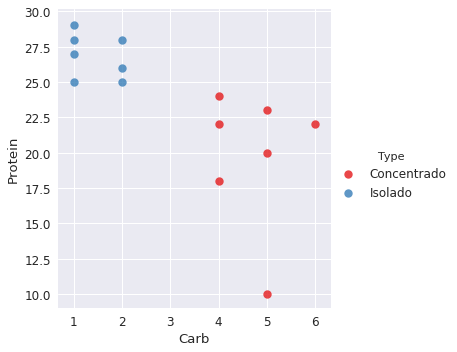

In [54]:
#Plot two ingredients
sns.lmplot('Carb', 'Protein', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [55]:
#Specific input models
ingredients = recipes[['Carb','Protein']].as_matrix() #Creat a list sorted with Carb and Protein
type_label = np.where(recipes['Type']=='Concentrado', 0, 1) #If Type == Concentrado add 0 else add 1

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Carb', 'Protein']

In [56]:
#Fit the model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(1, 12)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
w

array([-0.8,  0.4])

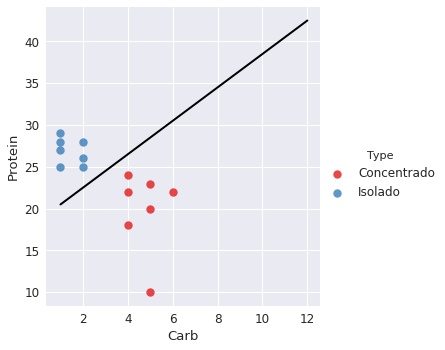

In [58]:
# Plot the hyperplane
sns.lmplot('Carb', 'Protein', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

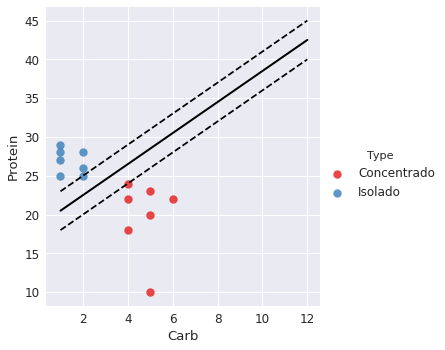

In [59]:
# Look at the margins and support vectors
sns.lmplot('Carb', 'Protein', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [60]:
# Create a function to guess when a whey isolado or concentrado
def concentrado_or_isolado(carb, protein):
    if(model.predict([[carb, protein]]))==0:
        print("It's a whey Concentrado")
    else:
        print("It's a whey Isolado")

In [61]:
concentrado_or_isolado(7,24)

It's a whey Concentrado


In [74]:
concentrado_or_isolado(2.2,23)

It's a whey Isolado


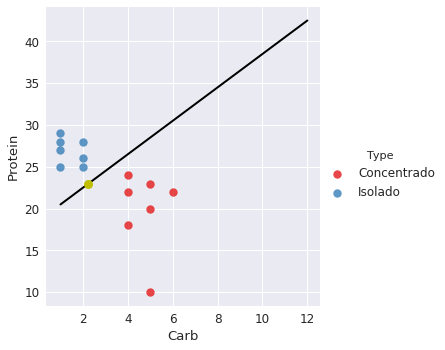

In [75]:
# Plot the point to visually see where the point lies
sns.lmplot('Carb', 'Protein', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(2.22, 23, 'yo', markersize='9');